In [1]:
import arc
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy import stats

## IW & Actual yield analysis

In [2]:
# Variables
# SF numpy files path
SF_np_path ="/home/ucfaya1@ad.ucl.ac.uk/Downloads/2021-UCL-model_output"

# Actual yield csv data path 
csv = '/home/ucfaya1@ad.ucl.ac.uk/Desktop/HI_Data_yara_new_backup_v1/code_data/save_code_data\DMP_AVR_geometry30102021.csv'

In [3]:
df_csv = pd.read_csv(csv)
df_csv.columns

Index(['FieldName', 'HarvestDate', 'Variety', 'HaDone%',
       'Wet_Actual_Yield_tonsfield', 'AverageTonsHa', 'TotalArea_Ha',
       'DMPCumulative_kgha', 'Average_kgha', 'Wet_Actual_Yield_kgfield', 'DM',
       'dry_actual_average_kgha', 'dry_actual_kgfield',
       'IW_Predicted_yield_kgha', 'IW_Predicted_yield_kgfield', 'geometry',
       'SoilType'],
      dtype='object')

## IW yield prediction average Analysis

R-squared (R2) Score: 0.2057730878512577


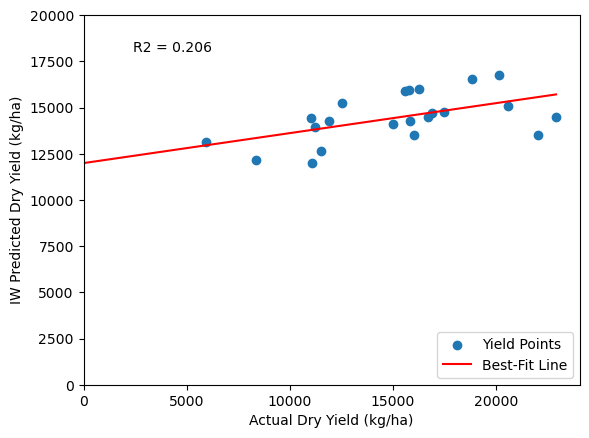

In [4]:
# IW predicted total yield (= DMP x HI) 
X = df_csv[['IW_Predicted_yield_kgha']]  # Predicted dataset
y = df_csv['dry_actual_average_kgha']  # Actual dataset

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a LinearRegression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Test the model on the testing data
y_pred = model.predict(X_test)

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)

# Scatter plot with R2 score
plt.scatter(y_test, y_pred, label='Yield Points')
plt.xlabel('Actual Dry Yield (kg/ha)')
plt.ylabel('IW Predicted Dry Yield (kg/ha)')
plt.text(0.1, 0.9, f'R2 = {r2:.3f}', transform=plt.gca().transAxes)

# Calculate the coefficients of the best-fit line using np.polyfit
a, b = np.polyfit(y_test, y_pred, 1)
# Plot the best-fit line
x_range = np.linspace(0, max(y_test), 100)
plt.plot(x_range, a * x_range + b, color='red', label='Best-Fit Line')
plt.legend(loc='lower right')

# Set the plot's x and y axis to start at 0 and set the upper limit of y-axis to 20000
plt.xlim(0)
plt.ylim(0,20000)

# Save the plot as an image file
plt.savefig('/home/ucfaya1@ad.ucl.ac.uk/Desktop/plots/IW_avg_2021.png', dpi=400)
plt.show()

## IW yield prediction per field Analysis

R-squared (R2) Score: 0.8631782783811788


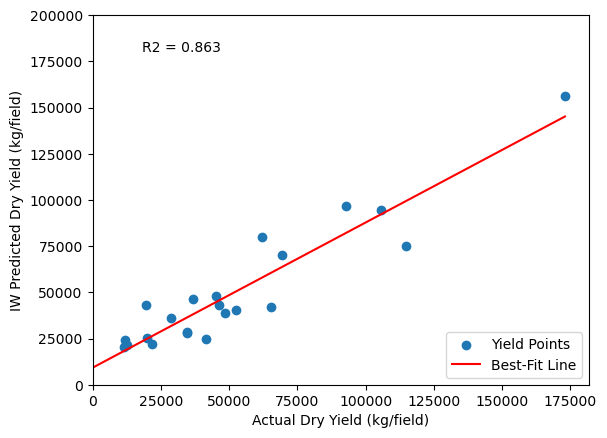

In [5]:
# IW predicted total yield (= DMP x HI) 
X = df_csv[['IW_Predicted_yield_kgfield']]  # Predicted dataset
y = df_csv['dry_actual_kgfield']  # Actual dataset

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a LinearRegression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Test the model on the testing data
y_pred = model.predict(X_test)

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)

# Scatter plot with R2 score
plt.scatter(y_test, y_pred, label='Yield Points')
plt.xlabel('Actual Dry Yield (kg/field)')
plt.ylabel('IW Predicted Dry Yield (kg/field)')
plt.text(0.1, 0.9, f'R2 = {r2:.3f}', transform=plt.gca().transAxes)

# Calculate the coefficients of the best-fit line using np.polyfit
a, b = np.polyfit(y_test, y_pred, 1)
# Plot the best-fit line
x_range = np.linspace(0, max(y_test), 100)
plt.plot(x_range, a * x_range + b, color='red', label='Best-Fit Line')
plt.legend(loc='lower right')

# Set the plot's x and y axis to start at 0 and set the upper limit of y-axis to 20000
plt.xlim(0)
plt.ylim(0,200000)

# Save the plot as an image file
plt.savefig('/home/ucfaya1@ad.ucl.ac.uk/Desktop/plots/IW_tot_2021.png', dpi=400)
plt.show()

## IW & field size Analysis

R-squared (R2) Score: 0.9054646311305048


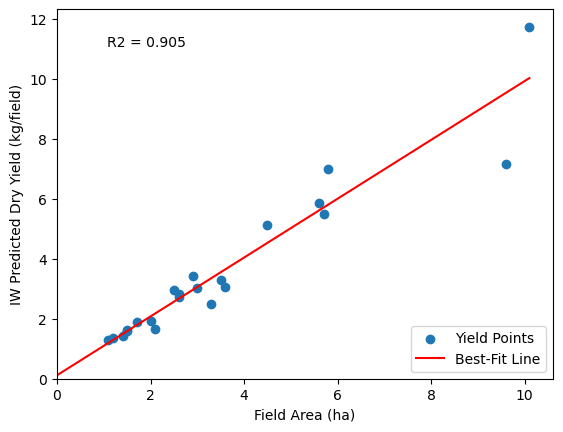

In [6]:
# IW predicted total yield (= DMP x HI) 
X = df_csv[['IW_Predicted_yield_kgfield']]  # Predicted dataset
y = df_csv['TotalArea_Ha']       # Actual dataset

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a LinearRegression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Test the model on the testing data
y_pred = model.predict(X_test)

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)

# Scatter plot with R2 score
plt.scatter(y_test, y_pred, label='Yield Points')
plt.xlabel('Field Area (ha)')
plt.ylabel('IW Predicted Dry Yield (kg/field)')
plt.text(0.1, 0.9, f'R2 = {r2:.3f}', transform=plt.gca().transAxes)

# Calculate the coefficients of the best-fit line using np.polyfit
a, b = np.polyfit(y_test, y_pred, 1)
# Plot the best-fit line
x_range = np.linspace(0, max(y_test), 100)
plt.plot(x_range, a * x_range + b, color='red', label='Best-Fit Line')
plt.legend(loc='lower right')

# Set the plot's x and y axis to start at 0 and set the upper limit of y-axis to 20000
plt.xlim(0)
plt.ylim(0)

# Save the plot as an image file
plt.savefig('/home/ucfaya1@ad.ucl.ac.uk/Desktop/plots/IW_area_2021.png', dpi=400)
plt.show()

## ARC & IW

In [7]:
year_2021 = '/home/ucfaya1@ad.ucl.ac.uk/Desktop/HI_Data_yara_new_backup_v1/code_data/save_code_data/IW_ARC_maize_2021.csv'

In [8]:
df_2021 = pd.read_csv(year_2021)
df_2021.columns

Index(['FieldName', 'HarvestDate', 'Variety', 'HaDone%',
       'Wet_Actual_Yield_tonsfield', 'AverageTonsHa', 'TotalArea_Ha',
       'DMPCumulative_kgha', 'Average_kgha', 'Wet_Actual_Yield_kgfield', 'DM',
       'dry_actual_average_kgha', 'dry_actual_kgfield',
       'IW_Predicted_yield_kgha', 'IW_Predicted_yield_kgfield', 'geometry',
       'SoilType', 'N', 'Cab', 'Cm', 'Cw', 'LAI', 'Ala', 'Cbrown', 'm0', 'n0',
       'm1', 'n1', 'B', 'S1', 'S2', 'SMp'],
      dtype='object')

R-squared (R2) Score: 0.6527665838539496


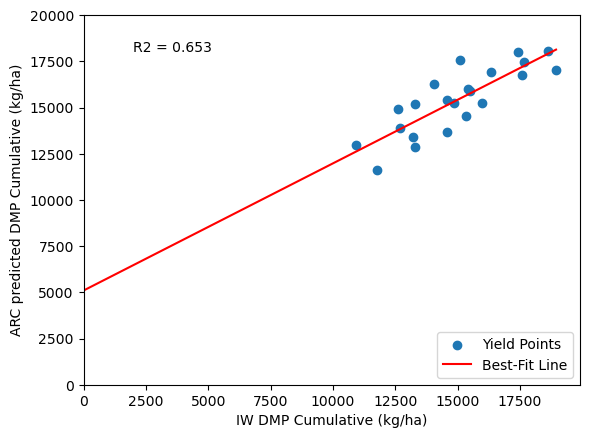

In [9]:
# Biophysical VS Avg DMP 
X = df_2021[['N', 'Cab', 'Cm', 'Cw', 'LAI', 'Ala', 'Cbrown']] # Predicted dataset
y = df_2021['DMPCumulative_kgha']       # Actual dataset

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a LinearRegression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Test the model on the testing data
y_pred = model.predict(X_test)

# Assuming you have 'y_test' as the actual yield test data and 'y_pred' as the modeled predicted values
r2 = r2_score(y_test, y_pred)

print("R-squared (R2) Score:", r2)

# Scatter plot with R2 score
plt.scatter(y_test, y_pred, label='Yield Points')
plt.xlabel('IW DMP Cumulative (kg/ha)')
plt.ylabel('ARC predicted DMP Cumulative (kg/ha)')
plt.text(0.1, 0.9, f'R2 = {r2:.3f}', transform=plt.gca().transAxes)

# Calculate the coefficients of the best-fit line using np.polyfit
a, b = np.polyfit(y_test, y_pred, 1)
# Plot the best-fit line
x_range = np.linspace(0, max(y_test), 100)
plt.plot(x_range, a * x_range + b, color='red', label='Best-Fit Line')
plt.legend(loc='lower right')

# Set the plot's x and y axis to start at 0 and set the upper limit of y-axis to 20000
plt.xlim(0)
plt.ylim(0, 20000)

# Save the plot as an image file
plt.savefig('/home/ucfaya1@ad.ucl.ac.uk/Desktop/plots/BP_DMP_2021.png', dpi=400)
plt.show()

R-squared (R2) Score: 0.6770136467784372


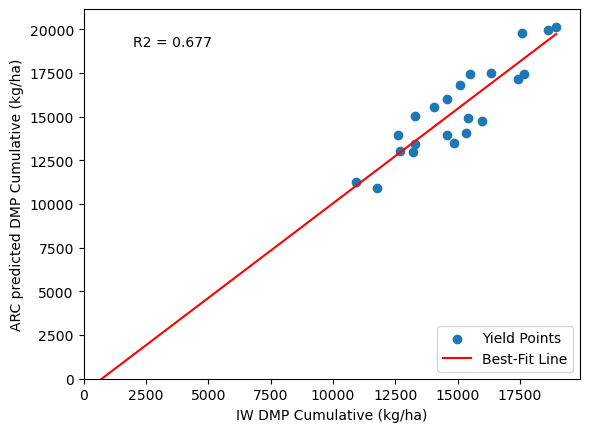

In [10]:
# biophysical + phenology VS avg yield kh/ha
X = df_2021[['N', 'Cab', 'Cm', 'Cw', 'LAI', 'Ala', 'Cbrown', 'm0', 'n0', 'm1', 'n1']] # Predicted dataset
y = df_2021['DMPCumulative_kgha']       # Actual dataset

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a LinearRegression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Test the model on the testing data
y_pred = model.predict(X_test)

# Assuming you have 'y_test' as the actual yield test data and 'y_pred' as the modeled predicted values
r2 = r2_score(y_test, y_pred)

print("R-squared (R2) Score:", r2)

# Scatter plot with R2 score
plt.scatter(y_test, y_pred, label='Yield Points')
plt.xlabel('IW DMP Cumulative (kg/ha)')
plt.ylabel('ARC predicted DMP Cumulative (kg/ha)')
plt.text(0.1, 0.9, f'R2 = {r2:.3f}', transform=plt.gca().transAxes)

# Calculate the coefficients of the best-fit line using np.polyfit
a, b = np.polyfit(y_test, y_pred, 1)
# Plot the best-fit line
x_range = np.linspace(0, max(y_test), 100)
plt.plot(x_range, a * x_range + b, color='red', label='Best-Fit Line')
plt.legend(loc='lower right')

# Set the plot's x and y axis to start at 0 and set the upper limit of y-axis to 20000
plt.xlim(0)
plt.ylim(0)

# Save the plot as an image file
plt.savefig('/home/ucfaya1@ad.ucl.ac.uk/Desktop/plots/BP_Phen_DMP_2021.png', dpi=400)
plt.show()

R-squared (R2) Score: 0.7526842274097137


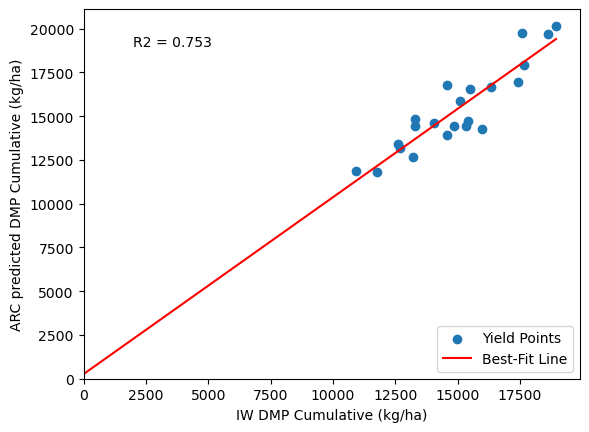

In [11]:
# 15 parameters VS DMP avg kg/ha
X = df_2021[['N', 'Cab', 'Cm', 'Cw', 'LAI', 'Ala', 'Cbrown', 'm0', 'n0', 'm1', 'n1','B','S1','S2','SMp']] # Predicted dataset
y = df_2021['DMPCumulative_kgha']       # Actual dataset

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a LinearRegression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Test the model on the testing data
y_pred = model.predict(X_test)

# Assuming you have 'y_test' as the actual yield test data and 'y_pred' as the modeled predicted values
r2 = r2_score(y_test, y_pred)

print("R-squared (R2) Score:", r2)

# Scatter plot with R2 score
plt.scatter(y_test, y_pred, label='Yield Points')
plt.xlabel('IW DMP Cumulative (kg/ha)')
plt.ylabel('ARC predicted DMP Cumulative (kg/ha)')
plt.text(0.1, 0.9, f'R2 = {r2:.3f}', transform=plt.gca().transAxes)

# Calculate the coefficients of the best-fit line using np.polyfit
a, b = np.polyfit(y_test, y_pred, 1)
# Plot the best-fit line
x_range = np.linspace(0, max(y_test), 100)
plt.plot(x_range, a * x_range + b, color='red', label='Best-Fit Line')
plt.legend(loc='lower right')
plt.xlim(0)
plt.ylim(0)

# Save the plot as an image file
plt.savefig('/home/ucfaya1@ad.ucl.ac.uk/Desktop/plots/15_DMP_2021.png', dpi=400)
plt.show()

R-squared (R2) Score: 0.7244885468031641


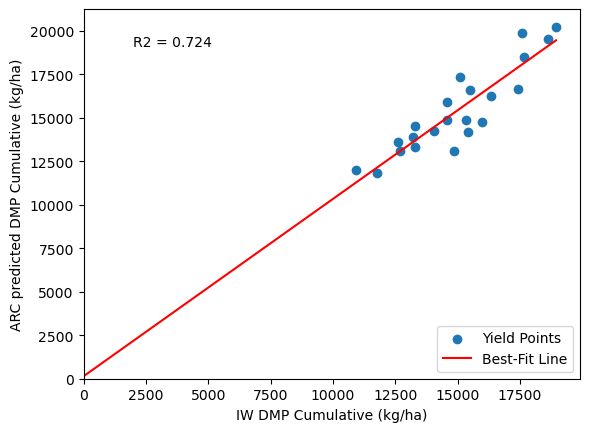

In [12]:
# bestfit for Yield
X = df_2021[['N', 'Cab', 'Cm', 'Cw', 'LAI', 'Ala', 'Cbrown', 'm0', 'n1','S2','B','SMp']] # Predicted dataset
y = df_2021['DMPCumulative_kgha']       # Actual dataset

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a LinearRegression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Test the model on the testing data
y_pred = model.predict(X_test)

# Assuming you have 'y_test' as the actual yield test data and 'y_pred' as the modeled predicted values
r2 = r2_score(y_test, y_pred)

print("R-squared (R2) Score:", r2)

# Scatter plot with R2 score
plt.scatter(y_test, y_pred, label='Yield Points')
plt.xlabel('IW DMP Cumulative (kg/ha)')
plt.ylabel('ARC predicted DMP Cumulative (kg/ha)')
plt.text(0.1, 0.9, f'R2 = {r2:.3f}', transform=plt.gca().transAxes)

# Calculate the coefficients of the best-fit line using np.polyfit
a, b = np.polyfit(y_test, y_pred, 1)
# Plot the best-fit line
x_range = np.linspace(0, max(y_test), 100)
plt.plot(x_range, a * x_range + b, color='red', label='Best-Fit Line')
plt.legend(loc='lower right')
plt.xlim(0)
plt.ylim(0)

# Save the plot as an image file
plt.savefig('/home/ucfaya1@ad.ucl.ac.uk/Desktop/plots/Bestfit_dmp.png', dpi=400)
plt.show()

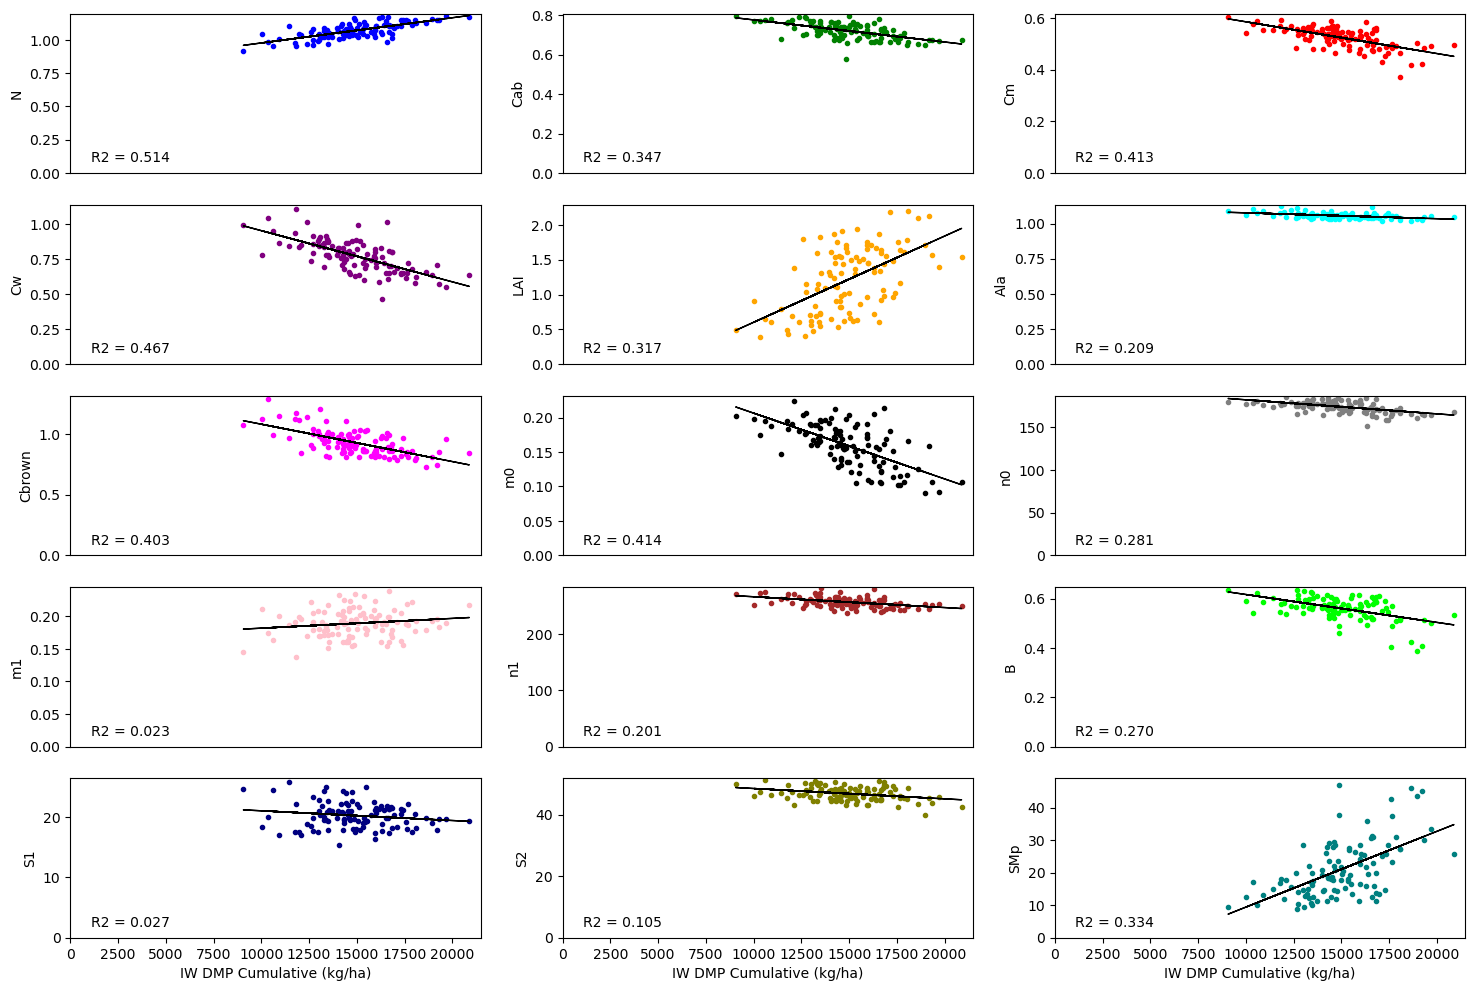

In [16]:
variable_colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta', 'black', 'gray', 'pink', 'brown', 'lime', 'navy', 'olive', 'teal']

# List of parameters
parameters = ['N', 'Cab', 'Cm', 'Cw', 'LAI', 'Ala', 'Cbrown', 'm0', 'n0', 'm1', 'n1', 'B', 'S1', 'S2', 'SMp']

num_rows = 5
num_cols = 3
num_plots = len(parameters)
num_figures = (num_plots + (num_rows * num_cols) - 1) // (num_rows * num_cols)

# Loop to create separate figures
for figure_num in range(num_figures):
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, 12))
    
    # Loop to populate subplots within the current figure
    for i, parameter in enumerate(parameters[figure_num * num_rows * num_cols : (figure_num + 1) * num_rows * num_cols]):
        row = i // num_cols
        col = i % num_cols
        ax = axes[row, col]
        
        x_axis = df_2021['DMPCumulative_kgha']
        y_axis = df_2021[parameter]
        color = variable_colors[i]
        
        # Create a LinearRegression model
        model = LinearRegression()
        
        # Fit the model
        model.fit(x_axis.values.reshape(-1, 1), y_axis)
        
        # Predict using the model
        y_pred = model.predict(x_axis.values.reshape(-1, 1))
        
        # Calculate R-squared
        r2 = r2_score(y_axis, y_pred)
        
        # Plot the data and regression line
        ax.plot(x_axis, y_axis, 'o', color=color, markersize=3)
        ax.plot(x_axis, y_pred, color='black', linewidth=1)
        ax.set_xlim(0)
        ax.set_ylim(0)
        ax.set_ylabel(parameter)
        
        # Display R-squared value at the bottom left corner
        ax.text(0.05, 0.05, f'R2 = {r2:.3f}', transform=ax.transAxes, ha='left', va='bottom')
        
        if row < num_rows - 1:
            ax.set_xticks([])
            ax.set_xlabel('')
        
        if row == num_rows - 1:
            ax.set_xlabel('IW DMP Cumulative (kg/ha)')
    
    # Save the figure as an image file
    plt.savefig('/home/ucfaya1@ad.ucl.ac.uk/Desktop/plots/15all_DMP_2021.png', dpi = 400)
    plt.show()

R-squared (R2) Score: 0.5123541127797447


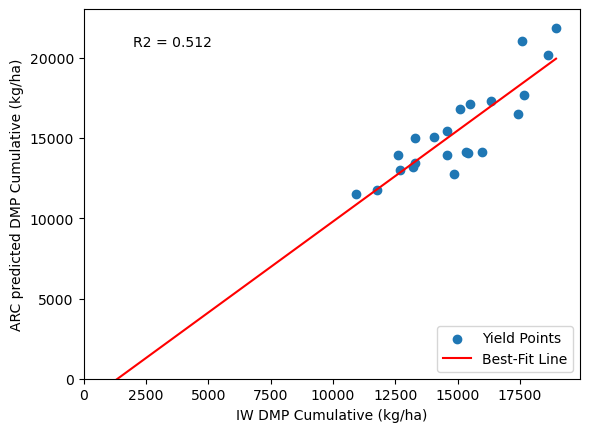

In [17]:
# ARC test VS DMP kg/ha
X = df_2021[['N', 'Cab', 'Cm', 'Cw', 'LAI', 'Ala', 'Cbrown', 'm0', 'n0', 'n1','B','SMp']] # Predicted dataset
y = df_2021['DMPCumulative_kgha']       # Actual dataset

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a LinearRegression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Test the model on the testing data
y_pred = model.predict(X_test)

# Assuming you have 'y_test' as the actual yield test data and 'y_pred' as the modeled predicted values
r2 = r2_score(y_test, y_pred)

print("R-squared (R2) Score:", r2)

# Scatter plot with R2 score
plt.scatter(y_test, y_pred, label='Yield Points')
plt.xlabel('IW DMP Cumulative (kg/ha)')
plt.ylabel('ARC predicted DMP Cumulative (kg/ha)')
plt.text(0.1, 0.9, f'R2 = {r2:.3f}', transform=plt.gca().transAxes)

# Calculate the coefficients of the best-fit line using np.polyfit
a, b = np.polyfit(y_test, y_pred, 1)
# Plot the best-fit line
x_range = np.linspace(0, max(y_test), 100)
plt.plot(x_range, a * x_range + b, color='red', label='Best-Fit Line')
plt.legend(loc='lower right')
plt.xlim(0)
plt.ylim(0)

# Save the plot as an image file
plt.savefig('/home/ucfaya1@ad.ucl.ac.uk/Desktop/plots/test_1_DMP_2021.png', dpi=400)
plt.show()